In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences


In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)

In [5]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=500))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 130ms/step - accuracy: 0.5581 - loss: 0.6832 - val_accuracy: 0.8314 - val_loss: 0.3974
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 122ms/step - accuracy: 0.8245 - loss: 0.4020 - val_accuracy: 0.8214 - val_loss: 0.4125
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 123ms/step - accuracy: 0.9109 - loss: 0.2302 - val_accuracy: 0.7934 - val_loss: 0.4692
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 105s 182ms/step - accuracy: 0.9625 - loss: 0.1108 - val_accuracy: 0.8113 - val_loss: 0.5543
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 155ms/step - accuracy: 0.9846 - loss: 0.0495 - val_accuracy: 0.7980 - val_loss: 0.7772


In [7]:
y_pred = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step


In [8]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

y_test = (y_test).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy*100:.2f} %')


Accuracy: 79.80 %


In [9]:
import matplotlib.pyplot as plt

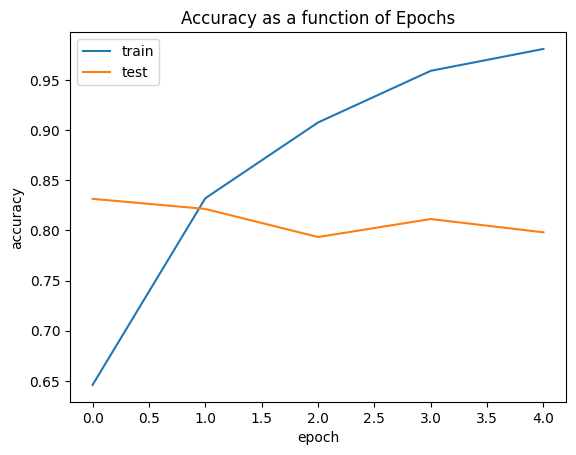

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy as a function of Epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()